# IMDB dataset


# You can predict the ratings of the movies and a lot more

In [200]:

# Data Manipulation 
import numpy as np
import pandas as pd
import math

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline


In [201]:
dataset_raw= pd.read_csv('IMDB-Movie-Data.csv')


In [202]:
# quick look at our data
dataset_raw.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Data Exploration

In [203]:
# Describing all the Numerical Features
dataset_raw.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [204]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [205]:
dataset_raw.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [206]:
sum(dataset_raw.duplicated())

0

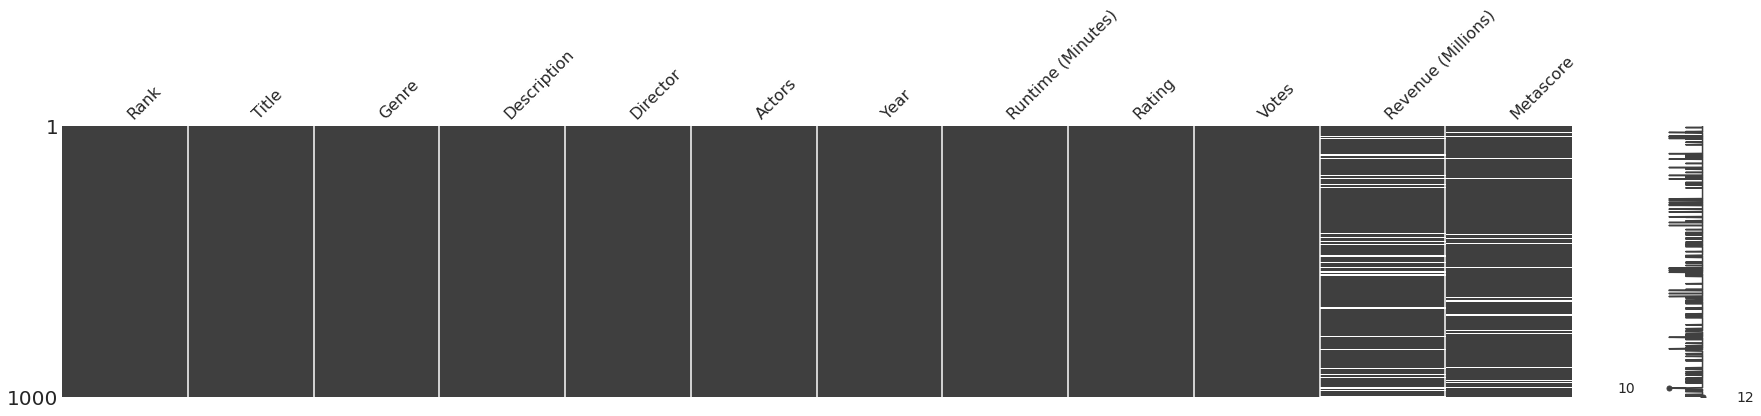

In [207]:
# How many missing values are there in our dataset?

missingno.matrix(dataset_raw, figsize=(30,5))

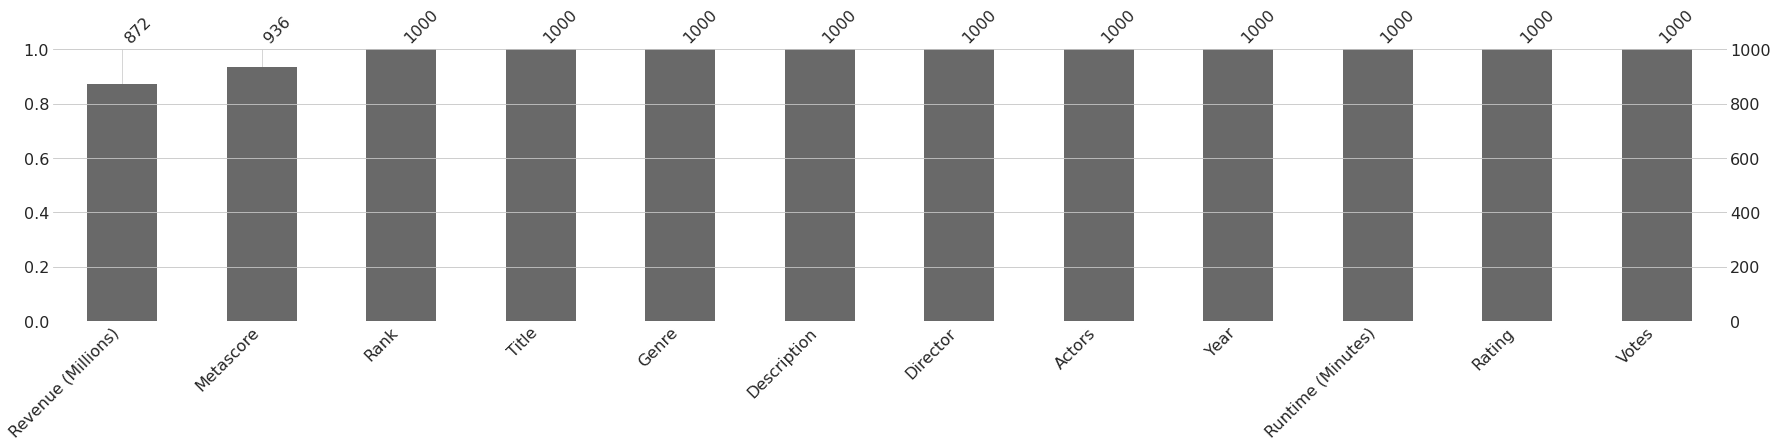

In [208]:
missingno.bar(dataset_raw, sort="ascending", figsize= (30,5))

In [209]:
dataset_raw.isnull().sum() # similar method to above missing value 

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [210]:
# Replacing the column names 
dataset_raw.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue'
    
}, inplace= True)


In [211]:
Revenue= dataset_raw['Revenue']

In [212]:
type(Revenue)

pandas.core.series.Series

In [213]:
Revenue_mean= Revenue.mean()
Revenue_mean

82.95637614678898

In [214]:
Revenue.fillna(Revenue_mean, inplace= True)


In [215]:
Revenue.isnull().sum()

0

In [216]:
dataset_raw.isnull().sum()

Rank            0
Title           0
Genre           0
Description     0
Director        0
Actors          0
Year            0
Runtime         0
Rating          0
Votes           0
Revenue         0
Metascore      64
dtype: int64

In [217]:
Metascore=dataset_raw['Metascore']

In [218]:
Metascore_mean=Metascore.mean()
Metascore_mean

58.98504273504273

In [219]:
Metascore.fillna(Metascore.mean, inplace= True)

In [220]:
Metascore.isnull().sum()

0

In [221]:
dataset_raw.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

In [222]:
dataset_raw.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000


In [223]:
dataset_raw['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

In [224]:
dataset_raw['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

In [225]:
len(dataset_raw['Genre'].unique())

207

## Correlation

In [226]:
rel= dataset_raw.corr()

In [227]:
rel

,Rank,Year,Runtime,Rating,Votes,Revenue
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941
Revenue,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000


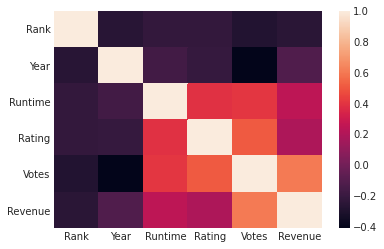

In [228]:
sns.heatmap(rel)

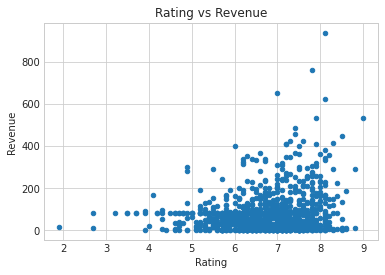

In [229]:
dataset_raw.plot(kind= 'scatter', x='Rating', y='Revenue', title= 'Rating vs Revenue')

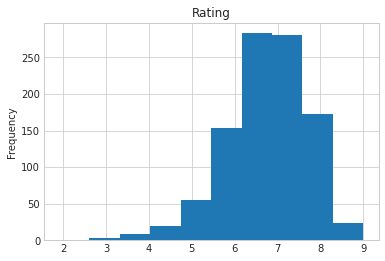

In [230]:
dataset_raw['Rating'].plot(kind= 'hist', title= 'Rating')

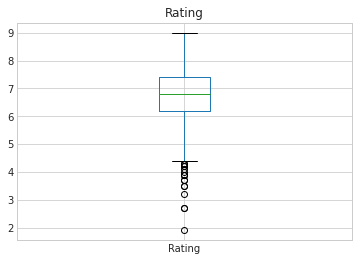

In [231]:
dataset_raw['Rating'].plot(kind= 'box', title= 'Rating')

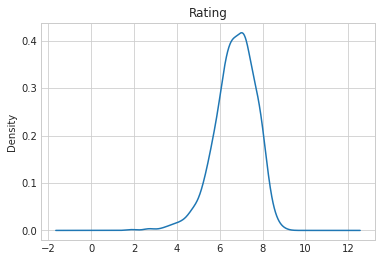

In [232]:
dataset_raw['Rating'].plot(kind= 'kde', title= 'Rating')

In [233]:
dataset_raw['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

In [234]:
rating_category= []
for rate in dataset_raw['Rating']:
    if rate > 6.2:
        rating_category.append('Excellent')
        
    else:
        rating_category.append('Bad')

rating_category     

['Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Bad',
 'Bad',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Bad',
 'Excellent',
 'Excellent',
 'Bad',
 'Bad',
 'Bad',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Bad',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Bad',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Bad',
 'Excellent',
 'Bad',
 'Excellent',
 'Bad',
 'Bad',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Bad',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Bad',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Exce

In [235]:
dataset_raw['Rating category']= rating_category

In [236]:
dataset_raw.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40,Bad


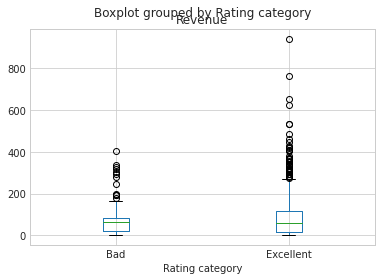

In [237]:
dataset_raw.boxplot(column='Revenue', by='Rating category')

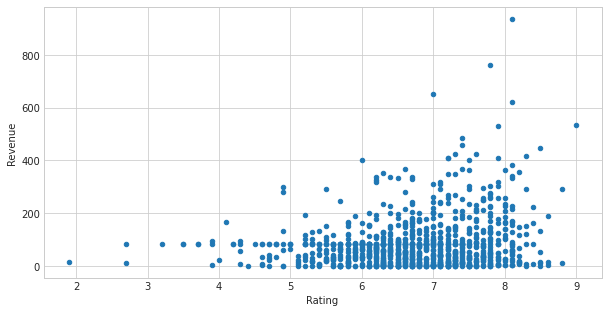

In [238]:
dataset_raw.plot(kind='scatter', x= 'Rating',y='Revenue',figsize=(10,5))